In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl
import sys


In [2]:
home_path = "C:\\sebin\\lab\\ecg2"
git_path = home_path+"\\git\\ecg_data_wfdb"
data_path = home_path + "\\" + "data"
sys.path.append(git_path)


# + 이전 모델과의 차이점
### !!더러운 데이터 처리! 
###  qbeat의 차이(그때는 4record 안들어갔음) 
### 50 epochs -> 31 epochs  (val_acc가 가장 높을때까지 돌림)

# 0. data pick
## n beat 5000 / v beat 5000 / s beat 2781 / q beat 3894  /f beat 802
-------------------------

In [3]:
from use.segment import pick

In [4]:
input_folder = abspath(data_path+"\\segment\\02_aami_lead2_144\\type2")
output_folder = abspath(data_path+"\\segment_pick\\model01_train01")

In [5]:
pick.random_ecg(5000,input_folder,output_folder)


random_ecg
in


# 1. data open to df
-------------------

In [6]:
from use.segment.open import ecgtodf

In [14]:
data = pd.DataFrame(ecgtodf(output_folder+"\\1_all",289))

100_N_1037.csv
100_N_1039.csv
100_N_1045.csv
100_N_1055.csv
100_N_1080.csv
100_N_109.csv
100_N_1115.csv
100_N_1123.csv
100_N_1151.csv
100_N_1178.csv
100_N_1189.csv
100_N_1215.csv
100_N_1227.csv
100_N_1238.csv
100_N_126.csv
100_N_1261.csv
100_N_128.csv
100_N_1282.csv
100_N_1308.csv
100_N_1329.csv
100_N_1337.csv
100_N_1396.csv
100_N_141.csv
100_N_1441.csv
100_N_1455.csv
100_N_1460.csv
100_N_1496.csv
100_N_1541.csv
100_N_1608.csv
100_N_163.csv
100_N_1641.csv
100_N_1650.csv
100_N_1653.csv
100_N_1664.csv
100_N_1673.csv
100_N_1689.csv
100_N_1691.csv
100_N_1711.csv
100_N_1712.csv
100_N_1769.csv
100_N_1781.csv
100_N_1794.csv
100_N_1800.csv
100_N_1856.csv
100_N_1878.csv
100_N_1888.csv
100_N_1897.csv
100_N_1899.csv
100_N_1904.csv
100_N_1914.csv
100_N_192.csv
100_N_1930.csv
100_N_1941.csv
100_N_1955.csv
100_N_1968.csv
100_N_2.csv
100_N_2011.csv
100_N_2046.csv
100_N_2053.csv
100_N_2060.csv
100_N_2061.csv
100_N_2067.csv
100_N_2075.csv
100_N_2084.csv
100_N_2090.csv
100_N_2107.csv
100_N_211.csv
100_N

In [15]:
data.shape

(17477, 289)

# 2.data to tensor
--------------------

In [20]:
data

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,-0.245,-0.27,-0.29,-0.275,-0.28,-0.28,-0.29,-0.29,-0.3,-0.29,...,-0.225,-0.21,-0.21,-0.2,-0.215,-0.225,-0.215,-0.2,-0.2,N
1,-0.215,-0.22,-0.19,-0.205,-0.2,-0.215,-0.22,-0.205,-0.2,-0.195,...,-0.215,-0.21,-0.225,-0.235,-0.23,-0.225,-0.225,-0.245,-0.25,N
2,-0.23,-0.215,-0.22,-0.245,-0.245,-0.24,-0.23,-0.24,-0.23,-0.245,...,-0.28,-0.285,-0.28,-0.28,-0.285,-0.295,-0.3,-0.3,-0.285,N
3,-0.3,-0.29,-0.29,-0.275,-0.285,-0.285,-0.3,-0.3,-0.29,-0.285,...,-0.265,-0.27,-0.27,-0.285,-0.28,-0.265,-0.255,-0.27,-0.285,N
4,-0.265,-0.27,-0.29,-0.275,-0.27,-0.26,-0.28,-0.28,-0.275,-0.275,...,-0.25,-0.235,-0.23,-0.235,-0.25,-0.26,-0.25,-0.255,-0.235,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17472,0.195,-0.005,-0.09,-0.125,-0.095,-0.095,-0.085,-0.09,-0.12,-0.155,...,0.185,0.335,0.49,0.675,0.875,1.085,1.26,1.385,1.395,S
17473,0.9,1.1,1.265,1.34,1.28,1.095,0.825,0.505,0.195,-0.03,...,-0.13,-0.11,-0.08,-0.02,0.055,0.15,0.285,0.445,0.6,S
17474,0.825,0.5,0.185,-0.06,-0.225,-0.27,-0.245,-0.205,-0.175,-0.17,...,-0.125,-0.145,-0.13,-0.13,-0.12,-0.125,-0.135,-0.14,-0.135,S
17475,-0.28,-0.29,-0.295,-0.315,-0.335,-0.335,-0.335,-0.345,-0.34,-0.335,...,-0.205,-0.205,-0.215,-0.21,-0.195,-0.17,-0.155,-0.145,-0.14,V


In [21]:
record = data.iloc[:,:288].to_numpy()
ann = data.iloc[:,288].to_numpy()

* 데이터 분할

In [24]:
train_x,test_x,train_y,test_y = train_test_split(record,ann,test_size=0.3,random_state=40,stratify=ann)

In [25]:
train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y)
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y)

In [26]:
train_x

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-0.105,-0.115,-0.13,-0.135,-0.145,-0.14,-0.17,-0.165,-0.175,-0.195,...,-0.255,-0.255,-0.25,-0.275,-0.265,-0.275,-0.28,-0.295,-0.3,-0.31
1,-0.105,-0.095,-0.08,-0.085,-0.09,-0.09,-0.08,-0.085,-0.08,-0.095,...,-0.325,-0.335,-0.355,-0.35,-0.335,-0.32,-0.3,-0.3,-0.295,-0.28
2,-0.215,-0.215,-0.22,-0.235,-0.245,-0.255,-0.26,-0.27,-0.28,-0.28,...,-0.28,-0.275,-0.275,-0.285,-0.295,-0.305,-0.32,-0.32,-0.315,-0.32
3,-0.215,-0.23,-0.24,-0.24,-0.23,-0.205,-0.2,-0.2,-0.22,-0.22,...,-0.385,-0.38,-0.355,-0.34,-0.345,-0.355,-0.365,-0.36,-0.345,-0.335
4,-0.42,-0.43,-0.455,-0.465,-0.49,-0.465,-0.46,-0.47,-0.475,-0.485,...,0.035,-0.02,-0.045,-0.08,-0.12,-0.16,-0.22,-0.28,-0.3,-0.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12228,-0.175,-0.18,-0.16,-0.155,-0.195,-0.2,-0.22,-0.195,-0.18,-0.155,...,1.045,1.015,0.995,0.95,0.92,0.89,0.855,0.83,0.785,0.745
12229,-0.98,-0.98,-0.97,-1.0,-1.02,-1.02,-1.005,-0.99,-0.985,-1.005,...,0.545,0.53,0.51,0.49,0.515,0.52,0.505,0.485,0.44,0.425
12230,0.065,0.07,0.065,0.055,0.045,0.025,0.015,-0.005,-0.015,-0.035,...,-0.18,-0.17,-0.19,-0.2,-0.195,-0.21,-0.23,-0.24,-0.24,-0.23
12231,-0.32,-0.33,-0.345,-0.335,-0.335,-0.325,-0.315,-0.31,-0.325,-0.325,...,0.9,0.855,0.83,0.78,0.75,0.69,0.64,0.595,0.55,0.54


In [27]:
train_y

,0
0,S
1,F
2,S
3,V
4,Q
...,...
12228,Q
12229,Q
12230,S
12231,N


*데이터 정상 분할 확인

In [28]:
train_y.value_counts()

N    3500
V    3500
Q    2726
S    1946
F     561
dtype: int64

In [29]:
test_y.value_counts()

N    1500
V    1500
Q    1168
S     835
F     241
dtype: int64

* to tensor and minmix scaler

In [31]:
from use.tensor.input import to_mixmax_tensor

In [32]:
train_x,train_y = to_mixmax_tensor(train_x,train_y)
test_x,test_y = to_mixmax_tensor(test_x,test_y)


# 3. model open
-----------------------------

* path 설정

In [67]:
model_path = git_path + "\\model\\01"
train_path = model_path + "\\train\\01"

In [53]:
model = kr.models.load_model(model_path+"\\model.h5")

* callbacks

In [56]:
callbacks = [kr.callbacks.TensorBoard(log_dir="board"),kr.callbacks.EarlyStopping(monitor="val_accuracy", patience =5)]

In [58]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [59]:
history = model.fit(train_x,train_y,epochs=50,validation_split=0.3, callbacks = callbacks)


Epoch 1/50
268/268 [==============================] - 2s 5ms/step - loss: 0.9645 - accuracy: 0.6433 - val_loss: 0.6324 - val_accuracy: 0.7801
Epoch 2/50
268/268 [==============================] - 1s 4ms/step - loss: 0.5229 - accuracy: 0.8310 - val_loss: 0.4361 - val_accuracy: 0.8556
Epoch 3/50
268/268 [==============================] - 1s 4ms/step - loss: 0.4082 - accuracy: 0.8650 - val_loss: 0.3731 - val_accuracy: 0.8766
Epoch 4/50
268/268 [==============================] - 1s 4ms/step - loss: 0.3502 - accuracy: 0.8894 - val_loss: 0.3343 - val_accuracy: 0.8913
Epoch 5/50
268/268 [==============================] - 1s 4ms/step - loss: 0.3166 - accuracy: 0.9004 - val_loss: 0.3045 - val_accuracy: 0.9065
Epoch 6/50
268/268 [==============================] - 1s 4ms/step - loss: 0.2940 - accuracy: 0.9065 - val_loss: 0.2846 - val_accuracy: 0.9057
Epoch 7/50
268/268 [==============================] - 1s 4ms/step - loss: 0.2769 - accuracy: 0.9135 - val_loss: 0.2771 - val_accuracy: 0.9101
Epoch 

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

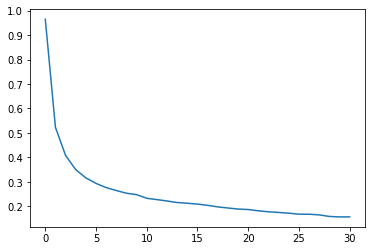

In [61]:
plt.plot(loss)

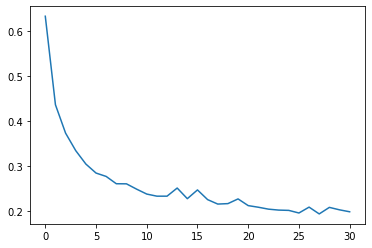

In [62]:
plt.plot(val_loss)

In [63]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

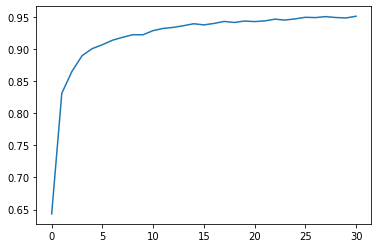

In [64]:
plt.plot(accuracy)

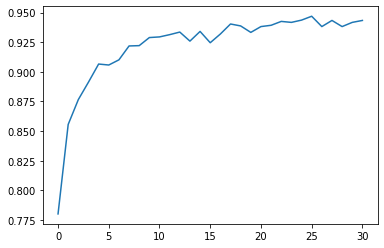

In [65]:
plt.plot(val_accuracy)

In [66]:
model.save(train_path+"\\"+"train_model.h5")

In [43]:
results = model.evaluate(test_x,test_y)

128/128 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9458
